In [3]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import pandas as pd
import data_extraction
import ARIMA
from datetime import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
def ANN_train(X_train, y_train, hidden_layers, alpha=1e-5, random_state=1):
    '''
    INPUT:
    timeseries: TYPE: DataFrame. Contains column named 'residual'
    q: TYPE: Integer. Decides how many historical values to consider
    hidden_layers: TYPE: Tuple of integers. The number on the i'th position decides number of nodes in hidden layer i

    OUTPUT:
    Returns trained model: TYPE: MLPRegressor
    '''
    model = MLPRegressor(solver="lbfgs", 
                         alpha=alpha, 
                         hidden_layer_sizes=hidden_layers, 
                         random_state=random_state, 
                         max_iter=20000,
                         #learning_rate = "adaptive",
                         tol=1e-5) #default tolerance
    model.fit(X_train, y_train)
    return model

In [5]:
past_weeks = 50
hidden_layers = (30, 20, 10)
nRowsRead = None
grid_number = 1

df = pd.read_pickle('forecast.pkl')

def to_datetime(string):
    return datetime.strptime(string, "%Y-%m-%d %H:%M:%S")


def to_string(date):
    return datetime.strftime(date, "%Y-%m-%d %H:%M:%S")


In [6]:
df['residuals'].size

12902

In [7]:
df['residuals'].values

array([-0.308722  , -0.13318109, -0.19555247, ..., -0.87122956,
       -3.92120099, -2.14008273])

In [8]:
def data_ANN_train(past_weeks, df):
    # input values
    # past_vals is the number of past values of the residuals that the ANN will use
    residuals = df["residuals"]
    X = []
    y = []
    
    for i in tqdm(range(len(residuals.values) - past_weeks*24*7)):
        X_el = residuals[i:i+24*7*past_weeks:24*7]
        X.append(X_el)
        y.append([residuals.iloc[i+past_weeks*24*7]])
    
    return X, y


In [9]:
X, y = data_ANN_train(past_weeks, df)


100%|██████████| 4502/4502 [00:00<00:00, 15172.71it/s]


In [10]:
X_train = X[:len(df)-len(data_extraction.get_timeseries("test", nRowsRead, 'loss', grid_number))]
y_train = y[:len(df)-len(data_extraction.get_timeseries("test", nRowsRead, 'loss', grid_number))]

In [11]:
X[0]

2018-12-09 01:00:00   -0.308722
2018-12-16 01:00:00   -0.991735
2018-12-23 01:00:00   -0.451012
2018-12-30 01:00:00   -0.165726
2019-01-06 01:00:00    0.174909
2019-01-13 01:00:00    0.251798
2019-01-20 01:00:00   -0.099372
2019-01-27 01:00:00   -0.669232
2019-02-03 01:00:00   -0.003436
2019-02-10 01:00:00   -0.686615
2019-02-17 01:00:00    0.330397
2019-02-24 01:00:00    0.034707
2019-03-03 01:00:00    0.863182
2019-03-10 01:00:00   -0.512348
2019-03-17 01:00:00   -0.618689
2019-03-24 01:00:00    1.538472
2019-03-31 01:00:00    0.761380
2019-04-07 01:00:00   -0.639257
2019-04-14 01:00:00   -0.163747
2019-04-21 01:00:00    0.244052
2019-04-28 01:00:00    0.543341
2019-05-05 01:00:00    0.675358
2019-05-12 01:00:00   -0.395918
2019-05-19 01:00:00    0.106719
2019-05-26 01:00:00   -0.060905
2019-06-02 01:00:00   -0.025430
2019-06-09 01:00:00    0.066593
2019-06-16 01:00:00    0.072194
2019-06-23 01:00:00   -0.144410
2019-06-30 01:00:00   -0.048741
2019-07-07 01:00:00    0.213777
2019-07-

In [12]:
model = ANN_train(X_train, y_train, hidden_layers)

In [120]:
def data_ANN_test(past_weeks, df):
    residuals = df["residuals"]
    test_size = len(data_extraction.get_timeseries("test", nRowsRead, 'loss', grid_number))
    train_size = len(residuals)-test_size
    X = []
    
    for i in tqdm(range(test_size)):
        print(residuals[train_size+i-past_weeks*24*7:train_size+i:24*7].index)
        X.append(residuals[train_size+i-past_weeks*24*7:train_size+i:24*7])
        
    
    return X
    

In [121]:
X_test = data_ANN_test(past_weeks, df)

  8%|▊         | 329/4335 [00:00<00:02, 1508.79it/s]

Index(['2018-12-16 00:00:00', '2018-12-23 00:00:00', '2018-12-30 00:00:00',
       '2019-01-06 00:00:00', '2019-01-13 00:00:00', '2019-01-20 00:00:00',
       '2019-01-27 00:00:00', '2019-02-03 00:00:00', '2019-02-10 00:00:00',
       '2019-02-17 00:00:00', '2019-02-24 00:00:00', '2019-03-03 00:00:00',
       '2019-03-10 00:00:00', '2019-03-17 00:00:00', '2019-03-24 00:00:00',
       '2019-03-31 00:00:00', '2019-04-07 00:00:00', '2019-04-14 00:00:00',
       '2019-04-21 00:00:00', '2019-04-28 00:00:00', '2019-05-05 00:00:00',
       '2019-05-12 00:00:00', '2019-05-19 00:00:00', '2019-05-26 00:00:00',
       '2019-06-02 00:00:00', '2019-06-09 00:00:00', '2019-06-16 00:00:00',
       '2019-06-23 00:00:00', '2019-06-30 00:00:00', '2019-07-07 00:00:00',
       '2019-07-14 00:00:00', '2019-07-21 00:00:00', '2019-07-28 00:00:00',
       '2019-08-04 00:00:00', '2019-08-11 00:00:00', '2019-08-18 00:00:00',
       '2019-08-25 00:00:00', '2019-09-01 00:00:00', '2019-09-08 00:00:00',
       '2019

 13%|█▎        | 545/4335 [00:00<00:03, 1254.13it/s]


Index(['2018-12-30 03:00:00', '2019-01-06 03:00:00', '2019-01-13 03:00:00',
       '2019-01-20 03:00:00', '2019-01-27 03:00:00', '2019-02-03 03:00:00',
       '2019-02-10 03:00:00', '2019-02-17 03:00:00', '2019-02-24 03:00:00',
       '2019-03-03 03:00:00', '2019-03-10 03:00:00', '2019-03-17 03:00:00',
       '2019-03-24 03:00:00', '2019-03-31 03:00:00', '2019-04-07 03:00:00',
       '2019-04-14 03:00:00', '2019-04-21 03:00:00', '2019-04-28 03:00:00',
       '2019-05-05 03:00:00', '2019-05-12 03:00:00', '2019-05-19 03:00:00',
       '2019-05-26 03:00:00', '2019-06-02 03:00:00', '2019-06-09 03:00:00',
       '2019-06-16 03:00:00', '2019-06-23 03:00:00', '2019-06-30 03:00:00',
       '2019-07-07 03:00:00', '2019-07-14 03:00:00', '2019-07-21 03:00:00',
       '2019-07-28 03:00:00', '2019-08-04 03:00:00', '2019-08-11 03:00:00',
       '2019-08-18 03:00:00', '2019-08-25 03:00:00', '2019-09-01 03:00:00',
       '2019-09-08 03:00:00', '2019-09-15 03:00:00', '2019-09-22 03:00:00',
       '201

 17%|█▋        | 742/4335 [00:00<00:03, 1071.43it/s]


Index(['2019-01-08 15:00:00', '2019-01-15 15:00:00', '2019-01-22 15:00:00',
       '2019-01-29 15:00:00', '2019-02-05 15:00:00', '2019-02-12 15:00:00',
       '2019-02-19 15:00:00', '2019-02-26 15:00:00', '2019-03-05 15:00:00',
       '2019-03-12 15:00:00', '2019-03-19 15:00:00', '2019-03-26 15:00:00',
       '2019-04-02 15:00:00', '2019-04-09 15:00:00', '2019-04-16 15:00:00',
       '2019-04-23 15:00:00', '2019-04-30 15:00:00', '2019-05-07 15:00:00',
       '2019-05-14 15:00:00', '2019-05-21 15:00:00', '2019-05-28 15:00:00',
       '2019-06-04 15:00:00', '2019-06-11 15:00:00', '2019-06-18 15:00:00',
       '2019-06-25 15:00:00', '2019-07-02 15:00:00', '2019-07-09 15:00:00',
       '2019-07-16 15:00:00', '2019-07-23 15:00:00', '2019-07-30 15:00:00',
       '2019-08-06 15:00:00', '2019-08-13 15:00:00', '2019-08-20 15:00:00',
       '2019-08-27 15:00:00', '2019-09-03 15:00:00', '2019-09-10 15:00:00',
       '2019-09-17 15:00:00', '2019-09-24 15:00:00', '2019-10-01 15:00:00',
       '201

 22%|██▏       | 970/4335 [00:00<00:03, 1097.11it/s]


Index(['2019-01-16 17:00:00', '2019-01-23 17:00:00', '2019-01-30 17:00:00',
       '2019-02-06 17:00:00', '2019-02-13 17:00:00', '2019-02-20 17:00:00',
       '2019-02-27 17:00:00', '2019-03-06 17:00:00', '2019-03-13 17:00:00',
       '2019-03-20 17:00:00', '2019-03-27 17:00:00', '2019-04-03 17:00:00',
       '2019-04-10 17:00:00', '2019-04-17 17:00:00', '2019-04-24 17:00:00',
       '2019-05-01 17:00:00', '2019-05-08 17:00:00', '2019-05-15 17:00:00',
       '2019-05-22 17:00:00', '2019-05-29 17:00:00', '2019-06-05 17:00:00',
       '2019-06-12 17:00:00', '2019-06-19 17:00:00', '2019-06-26 17:00:00',
       '2019-07-03 17:00:00', '2019-07-10 17:00:00', '2019-07-17 17:00:00',
       '2019-07-24 17:00:00', '2019-07-31 17:00:00', '2019-08-07 17:00:00',
       '2019-08-14 17:00:00', '2019-08-21 17:00:00', '2019-08-28 17:00:00',
       '2019-09-04 17:00:00', '2019-09-11 17:00:00', '2019-09-18 17:00:00',
       '2019-09-25 17:00:00', '2019-10-02 17:00:00', '2019-10-09 17:00:00',
       '201

 25%|██▍       | 1075/4335 [00:00<00:03, 1007.03it/s]


Index(['2019-01-26 03:00:00', '2019-02-02 03:00:00', '2019-02-09 03:00:00',
       '2019-02-16 03:00:00', '2019-02-23 03:00:00', '2019-03-02 03:00:00',
       '2019-03-09 03:00:00', '2019-03-16 03:00:00', '2019-03-23 03:00:00',
       '2019-03-30 03:00:00', '2019-04-06 03:00:00', '2019-04-13 03:00:00',
       '2019-04-20 03:00:00', '2019-04-27 03:00:00', '2019-05-04 03:00:00',
       '2019-05-11 03:00:00', '2019-05-18 03:00:00', '2019-05-25 03:00:00',
       '2019-06-01 03:00:00', '2019-06-08 03:00:00', '2019-06-15 03:00:00',
       '2019-06-22 03:00:00', '2019-06-29 03:00:00', '2019-07-06 03:00:00',
       '2019-07-13 03:00:00', '2019-07-20 03:00:00', '2019-07-27 03:00:00',
       '2019-08-03 03:00:00', '2019-08-10 03:00:00', '2019-08-17 03:00:00',
       '2019-08-24 03:00:00', '2019-08-31 03:00:00', '2019-09-07 03:00:00',
       '2019-09-14 03:00:00', '2019-09-21 03:00:00', '2019-09-28 03:00:00',
       '2019-10-05 03:00:00', '2019-10-12 03:00:00', '2019-10-19 03:00:00',
       '201

 30%|██▉       | 1290/4335 [00:01<00:02, 1025.86it/s]


Index(['2019-02-02 09:00:00', '2019-02-09 09:00:00', '2019-02-16 09:00:00',
       '2019-02-23 09:00:00', '2019-03-02 09:00:00', '2019-03-09 09:00:00',
       '2019-03-16 09:00:00', '2019-03-23 09:00:00', '2019-03-30 09:00:00',
       '2019-04-06 09:00:00', '2019-04-13 09:00:00', '2019-04-20 09:00:00',
       '2019-04-27 09:00:00', '2019-05-04 09:00:00', '2019-05-11 09:00:00',
       '2019-05-18 09:00:00', '2019-05-25 09:00:00', '2019-06-01 09:00:00',
       '2019-06-08 09:00:00', '2019-06-15 09:00:00', '2019-06-22 09:00:00',
       '2019-06-29 09:00:00', '2019-07-06 09:00:00', '2019-07-13 09:00:00',
       '2019-07-20 09:00:00', '2019-07-27 09:00:00', '2019-08-03 09:00:00',
       '2019-08-10 09:00:00', '2019-08-17 09:00:00', '2019-08-24 09:00:00',
       '2019-08-31 09:00:00', '2019-09-07 09:00:00', '2019-09-14 09:00:00',
       '2019-09-21 09:00:00', '2019-09-28 09:00:00', '2019-10-05 09:00:00',
       '2019-10-12 09:00:00', '2019-10-19 09:00:00', '2019-10-26 09:00:00',
       '201

 36%|███▌      | 1569/4335 [00:01<00:02, 1170.82it/s]


Index(['2019-02-13 13:00:00', '2019-02-20 13:00:00', '2019-02-27 13:00:00',
       '2019-03-06 13:00:00', '2019-03-13 13:00:00', '2019-03-20 13:00:00',
       '2019-03-27 13:00:00', '2019-04-03 13:00:00', '2019-04-10 13:00:00',
       '2019-04-17 13:00:00', '2019-04-24 13:00:00', '2019-05-01 13:00:00',
       '2019-05-08 13:00:00', '2019-05-15 13:00:00', '2019-05-22 13:00:00',
       '2019-05-29 13:00:00', '2019-06-05 13:00:00', '2019-06-12 13:00:00',
       '2019-06-19 13:00:00', '2019-06-26 13:00:00', '2019-07-03 13:00:00',
       '2019-07-10 13:00:00', '2019-07-17 13:00:00', '2019-07-24 13:00:00',
       '2019-07-31 13:00:00', '2019-08-07 13:00:00', '2019-08-14 13:00:00',
       '2019-08-21 13:00:00', '2019-08-28 13:00:00', '2019-09-04 13:00:00',
       '2019-09-11 13:00:00', '2019-09-18 13:00:00', '2019-09-25 13:00:00',
       '2019-10-02 13:00:00', '2019-10-09 13:00:00', '2019-10-16 13:00:00',
       '2019-10-23 13:00:00', '2019-10-30 13:00:00', '2019-11-06 13:00:00',
       '201

 42%|████▏     | 1819/4335 [00:01<00:02, 1049.50it/s]


Index(['2019-02-21 23:00:00', '2019-02-28 23:00:00', '2019-03-07 23:00:00',
       '2019-03-14 23:00:00', '2019-03-21 23:00:00', '2019-03-28 23:00:00',
       '2019-04-04 23:00:00', '2019-04-11 23:00:00', '2019-04-18 23:00:00',
       '2019-04-25 23:00:00', '2019-05-02 23:00:00', '2019-05-09 23:00:00',
       '2019-05-16 23:00:00', '2019-05-23 23:00:00', '2019-05-30 23:00:00',
       '2019-06-06 23:00:00', '2019-06-13 23:00:00', '2019-06-20 23:00:00',
       '2019-06-27 23:00:00', '2019-07-04 23:00:00', '2019-07-11 23:00:00',
       '2019-07-18 23:00:00', '2019-07-25 23:00:00', '2019-08-01 23:00:00',
       '2019-08-08 23:00:00', '2019-08-15 23:00:00', '2019-08-22 23:00:00',
       '2019-08-29 23:00:00', '2019-09-05 23:00:00', '2019-09-12 23:00:00',
       '2019-09-19 23:00:00', '2019-09-26 23:00:00', '2019-10-03 23:00:00',
       '2019-10-10 23:00:00', '2019-10-17 23:00:00', '2019-10-24 23:00:00',
       '2019-10-31 23:00:00', '2019-11-07 23:00:00', '2019-11-14 23:00:00',
       '201

 45%|████▌     | 1955/4335 [00:01<00:02, 1011.64it/s]


Index(['2019-03-03 23:00:00', '2019-03-10 23:00:00', '2019-03-17 23:00:00',
       '2019-03-24 23:00:00', '2019-03-31 23:00:00', '2019-04-07 23:00:00',
       '2019-04-14 23:00:00', '2019-04-21 23:00:00', '2019-04-28 23:00:00',
       '2019-05-05 23:00:00', '2019-05-12 23:00:00', '2019-05-19 23:00:00',
       '2019-05-26 23:00:00', '2019-06-02 23:00:00', '2019-06-09 23:00:00',
       '2019-06-16 23:00:00', '2019-06-23 23:00:00', '2019-06-30 23:00:00',
       '2019-07-07 23:00:00', '2019-07-14 23:00:00', '2019-07-21 23:00:00',
       '2019-07-28 23:00:00', '2019-08-04 23:00:00', '2019-08-11 23:00:00',
       '2019-08-18 23:00:00', '2019-08-25 23:00:00', '2019-09-01 23:00:00',
       '2019-09-08 23:00:00', '2019-09-15 23:00:00', '2019-09-22 23:00:00',
       '2019-09-29 23:00:00', '2019-10-06 23:00:00', '2019-10-13 23:00:00',
       '2019-10-20 23:00:00', '2019-10-27 23:00:00', '2019-11-03 23:00:00',
       '2019-11-10 23:00:00', '2019-11-17 23:00:00', '2019-11-24 23:00:00',
       '201

 48%|████▊     | 2062/4335 [00:01<00:02, 849.31it/s] 


Index(['2019-03-09 08:00:00', '2019-03-16 08:00:00', '2019-03-23 08:00:00',
       '2019-03-30 08:00:00', '2019-04-06 08:00:00', '2019-04-13 08:00:00',
       '2019-04-20 08:00:00', '2019-04-27 08:00:00', '2019-05-04 08:00:00',
       '2019-05-11 08:00:00', '2019-05-18 08:00:00', '2019-05-25 08:00:00',
       '2019-06-01 08:00:00', '2019-06-08 08:00:00', '2019-06-15 08:00:00',
       '2019-06-22 08:00:00', '2019-06-29 08:00:00', '2019-07-06 08:00:00',
       '2019-07-13 08:00:00', '2019-07-20 08:00:00', '2019-07-27 08:00:00',
       '2019-08-03 08:00:00', '2019-08-10 08:00:00', '2019-08-17 08:00:00',
       '2019-08-24 08:00:00', '2019-08-31 08:00:00', '2019-09-07 08:00:00',
       '2019-09-14 08:00:00', '2019-09-21 08:00:00', '2019-09-28 08:00:00',
       '2019-10-05 08:00:00', '2019-10-12 08:00:00', '2019-10-19 08:00:00',
       '2019-10-26 08:00:00', '2019-11-02 08:00:00', '2019-11-09 08:00:00',
       '2019-11-16 08:00:00', '2019-11-23 08:00:00', '2019-11-30 08:00:00',
       '201

 52%|█████▏    | 2255/4335 [00:02<00:02, 831.93it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 71%|███████   | 3077/4335 [00:03<00:01, 758.43it/s]


Index(['2019-04-18 07:00:00', '2019-04-25 07:00:00', '2019-05-02 07:00:00',
       '2019-05-09 07:00:00', '2019-05-16 07:00:00', '2019-05-23 07:00:00',
       '2019-05-30 07:00:00', '2019-06-06 07:00:00', '2019-06-13 07:00:00',
       '2019-06-20 07:00:00', '2019-06-27 07:00:00', '2019-07-04 07:00:00',
       '2019-07-11 07:00:00', '2019-07-18 07:00:00', '2019-07-25 07:00:00',
       '2019-08-01 07:00:00', '2019-08-08 07:00:00', '2019-08-15 07:00:00',
       '2019-08-22 07:00:00', '2019-08-29 07:00:00', '2019-09-05 07:00:00',
       '2019-09-12 07:00:00', '2019-09-19 07:00:00', '2019-09-26 07:00:00',
       '2019-10-03 07:00:00', '2019-10-10 07:00:00', '2019-10-17 07:00:00',
       '2019-10-24 07:00:00', '2019-10-31 07:00:00', '2019-11-07 07:00:00',
       '2019-11-14 07:00:00', '2019-11-21 07:00:00', '2019-11-28 07:00:00',
       '2019-12-05 07:00:00', '2019-12-12 07:00:00', '2019-12-19 07:00:00',
       '2019-12-26 13:00:00', '2020-01-02 16:00:00', '2020-01-09 16:00:00',
       '202

 75%|███████▍  | 3237/4335 [00:03<00:01, 717.60it/s]


Index(['2019-04-24 02:00:00', '2019-05-01 02:00:00', '2019-05-08 02:00:00',
       '2019-05-15 02:00:00', '2019-05-22 02:00:00', '2019-05-29 02:00:00',
       '2019-06-05 02:00:00', '2019-06-12 02:00:00', '2019-06-19 02:00:00',
       '2019-06-26 02:00:00', '2019-07-03 02:00:00', '2019-07-10 02:00:00',
       '2019-07-17 02:00:00', '2019-07-24 02:00:00', '2019-07-31 02:00:00',
       '2019-08-07 02:00:00', '2019-08-14 02:00:00', '2019-08-21 02:00:00',
       '2019-08-28 02:00:00', '2019-09-04 02:00:00', '2019-09-11 02:00:00',
       '2019-09-18 02:00:00', '2019-09-25 02:00:00', '2019-10-02 02:00:00',
       '2019-10-09 02:00:00', '2019-10-16 02:00:00', '2019-10-23 02:00:00',
       '2019-10-30 02:00:00', '2019-11-06 02:00:00', '2019-11-13 02:00:00',
       '2019-11-20 02:00:00', '2019-11-27 02:00:00', '2019-12-04 02:00:00',
       '2019-12-11 02:00:00', '2019-12-18 02:00:00', '2019-12-25 02:00:00',
       '2020-01-01 11:00:00', '2020-01-08 11:00:00', '2020-01-15 11:00:00',
       '202

 77%|███████▋  | 3340/4335 [00:03<00:01, 778.28it/s]


Index(['2019-05-01 01:00:00', '2019-05-08 01:00:00', '2019-05-15 01:00:00',
       '2019-05-22 01:00:00', '2019-05-29 01:00:00', '2019-06-05 01:00:00',
       '2019-06-12 01:00:00', '2019-06-19 01:00:00', '2019-06-26 01:00:00',
       '2019-07-03 01:00:00', '2019-07-10 01:00:00', '2019-07-17 01:00:00',
       '2019-07-24 01:00:00', '2019-07-31 01:00:00', '2019-08-07 01:00:00',
       '2019-08-14 01:00:00', '2019-08-21 01:00:00', '2019-08-28 01:00:00',
       '2019-09-04 01:00:00', '2019-09-11 01:00:00', '2019-09-18 01:00:00',
       '2019-09-25 01:00:00', '2019-10-02 01:00:00', '2019-10-09 01:00:00',
       '2019-10-16 01:00:00', '2019-10-23 01:00:00', '2019-10-30 01:00:00',
       '2019-11-06 01:00:00', '2019-11-13 01:00:00', '2019-11-20 01:00:00',
       '2019-11-27 01:00:00', '2019-12-04 01:00:00', '2019-12-11 01:00:00',
       '2019-12-18 01:00:00', '2019-12-25 01:00:00', '2020-01-01 10:00:00',
       '2020-01-08 10:00:00', '2020-01-15 10:00:00', '2020-01-23 10:00:00',
       '202

 81%|████████  | 3504/4335 [00:03<00:01, 729.74it/s]


Index(['2019-05-07 02:00:00', '2019-05-14 02:00:00', '2019-05-21 02:00:00',
       '2019-05-28 02:00:00', '2019-06-04 02:00:00', '2019-06-11 02:00:00',
       '2019-06-18 02:00:00', '2019-06-25 02:00:00', '2019-07-02 02:00:00',
       '2019-07-09 02:00:00', '2019-07-16 02:00:00', '2019-07-23 02:00:00',
       '2019-07-30 02:00:00', '2019-08-06 02:00:00', '2019-08-13 02:00:00',
       '2019-08-20 02:00:00', '2019-08-27 02:00:00', '2019-09-03 02:00:00',
       '2019-09-10 02:00:00', '2019-09-17 02:00:00', '2019-09-24 02:00:00',
       '2019-10-01 02:00:00', '2019-10-08 02:00:00', '2019-10-15 02:00:00',
       '2019-10-22 02:00:00', '2019-10-29 02:00:00', '2019-11-05 02:00:00',
       '2019-11-12 02:00:00', '2019-11-19 02:00:00', '2019-11-26 02:00:00',
       '2019-12-03 02:00:00', '2019-12-10 02:00:00', '2019-12-17 02:00:00',
       '2019-12-24 02:00:00', '2019-12-31 11:00:00', '2020-01-07 11:00:00',
       '2020-01-14 11:00:00', '2020-01-22 11:00:00', '2020-01-29 11:00:00',
       '202

 85%|████████▌ | 3694/4335 [00:04<00:00, 827.93it/s]


Index(['2019-05-13 20:00:00', '2019-05-20 20:00:00', '2019-05-27 20:00:00',
       '2019-06-03 20:00:00', '2019-06-10 20:00:00', '2019-06-17 20:00:00',
       '2019-06-24 20:00:00', '2019-07-01 20:00:00', '2019-07-08 20:00:00',
       '2019-07-15 20:00:00', '2019-07-22 20:00:00', '2019-07-29 20:00:00',
       '2019-08-05 20:00:00', '2019-08-12 20:00:00', '2019-08-19 20:00:00',
       '2019-08-26 20:00:00', '2019-09-02 20:00:00', '2019-09-09 20:00:00',
       '2019-09-16 20:00:00', '2019-09-23 20:00:00', '2019-09-30 20:00:00',
       '2019-10-07 20:00:00', '2019-10-14 20:00:00', '2019-10-21 20:00:00',
       '2019-10-28 20:00:00', '2019-11-04 20:00:00', '2019-11-11 20:00:00',
       '2019-11-18 20:00:00', '2019-11-25 20:00:00', '2019-12-02 20:00:00',
       '2019-12-09 20:00:00', '2019-12-16 20:00:00', '2019-12-23 20:00:00',
       '2019-12-31 05:00:00', '2020-01-07 05:00:00', '2020-01-14 05:00:00',
       '2020-01-22 05:00:00', '2020-01-29 05:00:00', '2020-02-05 05:00:00',
       '202

 89%|████████▉ | 3864/4335 [00:04<00:00, 773.55it/s]


Index(['2019-05-21 11:00:00', '2019-05-28 11:00:00', '2019-06-04 11:00:00',
       '2019-06-11 11:00:00', '2019-06-18 11:00:00', '2019-06-25 11:00:00',
       '2019-07-02 11:00:00', '2019-07-09 11:00:00', '2019-07-16 11:00:00',
       '2019-07-23 11:00:00', '2019-07-30 11:00:00', '2019-08-06 11:00:00',
       '2019-08-13 11:00:00', '2019-08-20 11:00:00', '2019-08-27 11:00:00',
       '2019-09-03 11:00:00', '2019-09-10 11:00:00', '2019-09-17 11:00:00',
       '2019-09-24 11:00:00', '2019-10-01 11:00:00', '2019-10-08 11:00:00',
       '2019-10-15 11:00:00', '2019-10-22 11:00:00', '2019-10-29 11:00:00',
       '2019-11-05 11:00:00', '2019-11-12 11:00:00', '2019-11-19 11:00:00',
       '2019-11-26 11:00:00', '2019-12-03 11:00:00', '2019-12-10 11:00:00',
       '2019-12-17 11:00:00', '2019-12-24 11:00:00', '2019-12-31 20:00:00',
       '2020-01-07 20:00:00', '2020-01-14 20:00:00', '2020-01-22 20:00:00',
       '2020-01-29 20:00:00', '2020-02-05 20:00:00', '2020-02-12 20:00:00',
       '202

 93%|█████████▎| 4025/4335 [00:04<00:00, 784.64it/s]


Index(['2019-05-28 01:00:00', '2019-06-04 01:00:00', '2019-06-11 01:00:00',
       '2019-06-18 01:00:00', '2019-06-25 01:00:00', '2019-07-02 01:00:00',
       '2019-07-09 01:00:00', '2019-07-16 01:00:00', '2019-07-23 01:00:00',
       '2019-07-30 01:00:00', '2019-08-06 01:00:00', '2019-08-13 01:00:00',
       '2019-08-20 01:00:00', '2019-08-27 01:00:00', '2019-09-03 01:00:00',
       '2019-09-10 01:00:00', '2019-09-17 01:00:00', '2019-09-24 01:00:00',
       '2019-10-01 01:00:00', '2019-10-08 01:00:00', '2019-10-15 01:00:00',
       '2019-10-22 01:00:00', '2019-10-29 01:00:00', '2019-11-05 01:00:00',
       '2019-11-12 01:00:00', '2019-11-19 01:00:00', '2019-11-26 01:00:00',
       '2019-12-03 01:00:00', '2019-12-10 01:00:00', '2019-12-17 01:00:00',
       '2019-12-24 01:00:00', '2019-12-31 10:00:00', '2020-01-07 10:00:00',
       '2020-01-14 10:00:00', '2020-01-22 10:00:00', '2020-01-29 10:00:00',
       '2020-02-05 10:00:00', '2020-02-12 10:00:00', '2020-02-19 10:00:00',
       '202

 96%|█████████▋| 4183/4335 [00:04<00:00, 749.22it/s]


Index(['2019-06-03 10:00:00', '2019-06-10 10:00:00', '2019-06-17 10:00:00',
       '2019-06-24 10:00:00', '2019-07-01 10:00:00', '2019-07-08 10:00:00',
       '2019-07-15 10:00:00', '2019-07-22 10:00:00', '2019-07-29 10:00:00',
       '2019-08-05 10:00:00', '2019-08-12 10:00:00', '2019-08-19 10:00:00',
       '2019-08-26 10:00:00', '2019-09-02 10:00:00', '2019-09-09 10:00:00',
       '2019-09-16 10:00:00', '2019-09-23 10:00:00', '2019-09-30 10:00:00',
       '2019-10-07 10:00:00', '2019-10-14 10:00:00', '2019-10-21 10:00:00',
       '2019-10-28 10:00:00', '2019-11-04 10:00:00', '2019-11-11 10:00:00',
       '2019-11-18 10:00:00', '2019-11-25 10:00:00', '2019-12-02 10:00:00',
       '2019-12-09 10:00:00', '2019-12-16 10:00:00', '2019-12-23 10:00:00',
       '2019-12-30 19:00:00', '2020-01-06 19:00:00', '2020-01-13 19:00:00',
       '2020-01-21 19:00:00', '2020-01-28 19:00:00', '2020-02-04 19:00:00',
       '2020-02-11 19:00:00', '2020-02-18 19:00:00', '2020-02-25 19:00:00',
       '202

100%|██████████| 4335/4335 [00:04<00:00, 884.55it/s]


Index(['2019-06-10 01:00:00', '2019-06-17 01:00:00', '2019-06-24 01:00:00',
       '2019-07-01 01:00:00', '2019-07-08 01:00:00', '2019-07-15 01:00:00',
       '2019-07-22 01:00:00', '2019-07-29 01:00:00', '2019-08-05 01:00:00',
       '2019-08-12 01:00:00', '2019-08-19 01:00:00', '2019-08-26 01:00:00',
       '2019-09-02 01:00:00', '2019-09-09 01:00:00', '2019-09-16 01:00:00',
       '2019-09-23 01:00:00', '2019-09-30 01:00:00', '2019-10-07 01:00:00',
       '2019-10-14 01:00:00', '2019-10-21 01:00:00', '2019-10-28 01:00:00',
       '2019-11-04 01:00:00', '2019-11-11 01:00:00', '2019-11-18 01:00:00',
       '2019-11-25 01:00:00', '2019-12-02 01:00:00', '2019-12-09 01:00:00',
       '2019-12-16 01:00:00', '2019-12-23 01:00:00', '2019-12-30 10:00:00',
       '2020-01-06 10:00:00', '2020-01-13 10:00:00', '2020-01-21 10:00:00',
       '2020-01-28 10:00:00', '2020-02-04 10:00:00', '2020-02-11 10:00:00',
       '2020-02-18 10:00:00', '2020-02-25 10:00:00', '2020-03-03 10:00:00',
       '202

In [60]:
X_test[24*7*2+3].size

50

In [94]:
def ANN_pred(model, X_test, X, y):
    train_size = len(X)-len(data_extraction.get_timeseries("test", nRowsRead, 'loss', grid_number))
    X_test = X_test.copy()
    y_test = []
    for i in tqdm(range(len(X_test))):
        
        X_test_el = X_test[i].values
        
        val = model.predict(X_test_el.reshape(1,-1))

        y_test.append(val[0])
        """
        if i%24 == 23:
            if train_size +i > len(X)-1:
                continue
            model = ANN_train(X[:train_size+i+1], y[:train_size+i+1], hidden_layers)
        """ 
    return y_test



In [95]:
y_pred = ANN_pred(model, X_test,X,y)

100%|██████████| 4335/4335 [00:00<00:00, 4564.34it/s]


<AxesSubplot:>

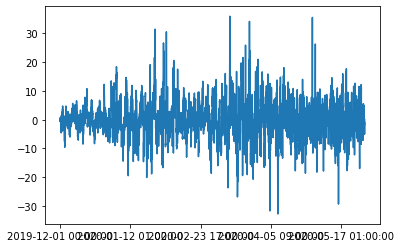

In [105]:
temp = pd.DataFrame(index = data_extraction.get_timeseries("test", nRowsRead, 'loss', grid_number).index)
temp['pred_residuals'] = y_pred
temp = df.join(temp)
(temp['residuals']-temp['pred_residuals']).dropna().plot()

grid-loss      ARIMA  residuals  pred_residuals  \
2019-12-01 00:00:00   21.55210  21.594308  -0.042208        0.480529   
2019-12-01 01:00:00   20.71190  20.364941   0.346959       -0.312941   
2019-12-01 02:00:00   20.27340  20.250330   0.023070        0.217361   
2019-12-01 03:00:00   20.25370  20.643240  -0.389540        0.349283   
2019-12-01 04:00:00   20.40550  20.628952  -0.223452       -0.981272   
...                        ...        ...        ...             ...   
2020-05-30 19:00:00    8.55980   7.129942   1.429858        3.391124   
2020-05-30 20:00:00    6.95209   6.751133   0.200957        1.967481   
2020-05-30 21:00:00    8.11558   8.986810  -0.871230        0.012310   
2020-05-30 23:00:00    7.26431  11.185511  -3.921201        1.096565   
2020-05-31 00:00:00    6.78796   8.928043  -2.140083       -2.147372   

                        Hybrid  arima_sum_error  hybrid_sum_error  \
2019-12-01 00:00:00  22.074837         0.042208          0.522737   
2019-12-01 01:00:00  20.052000         0.346959          0.659900   
2019-12-01 02:00:00  20.467691         0.023070          0.194291   
2019-12-01 03:00:00  20.992523         0.389540          0.738823   
2019-12-01 04:00:00  19.647680         0.223452          0.757820   
...                        ...              ...               ...   
2020-05-30 19:00:00  10.521065         1.429858          1.961265   
2020-05-30 20:00:00   8.718614         0.200957          1.766524   
2020-05-30 21:00:00   8.999120         0.871230          0.883540   
2020-05-30 23:00:00  12.282076         3.921201          5.017766   
2020-05-31 00:00:00   6.780671         2.140083          0.007289   

                        arima_cum    hybrid_cum  
2019-12-01 00:00:00      0.042208      0.522737  
2019-12-01 01:00:00      0.389167      1.182637  
2019-12-01 02:00:00      0.412237      1.376928  
2019-12-01 03:00:00      0.801777      2.115751  
2019-12-01 04:00:00      1.025230      2.873571  
...                           ...           ...  
2020-05-30 19:00:00  17208.058756  19430.614261  
2020-05-30 20:00:00  17208.259714  19432.380785  
2020-05-30 21:00:00  17209.130943  19433.264325  
2020-05-30 23:00:00  17213.052144  19438.282090  
2020-05-31 00:00:00  17215.192227  19438.289380  

[4335 rows x 9 columns]

In [147]:
temp = temp.dropna()
temp['Hybrid'] = temp['ARIMA']+temp['pred_residuals']
temp['arima_sum_error'] = abs(temp['grid-loss'] - temp['ARIMA'])
temp['hybrid_sum_error'] = abs(temp['grid-loss'] - temp['Hybrid'])

temp['arima_cum'] = temp['arima_sum_error'].cumsum()
temp['hybrid_cum'] = temp['hybrid_sum_error'].cumsum()
temp['error_in_res'] = (temp['residuals']-temp['pred_residuals'])

<AxesSubplot:>

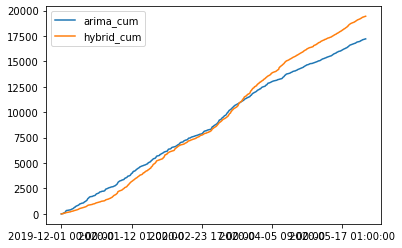

In [148]:
temp[['arima_cum','hybrid_cum']].plot()


In [149]:
(temp['arima_cum'].iloc[-1]-temp['hybrid_cum'].iloc[-1])/temp['arima_cum'].iloc[-1]

-0.12913577284493

<AxesSubplot:>

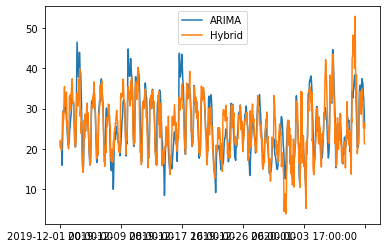

In [150]:
temp[['ARIMA','Hybrid']].loc["2019-11-30 00:00:00":"2020-01-12 00:00:00"].plot()

In [151]:
diff = temp['grid-loss']-temp['Hybrid']
(diff**2).mean()

39.71921569395255

2019-12-01 00:00:00       0.518710
2019-12-01 01:00:00       1.417307
2019-12-01 02:00:00       1.778026
2019-12-01 03:00:00       3.336018
2019-12-01 04:00:00       4.068085
                          ...     
2020-05-30 19:00:00    3874.728314
2020-05-30 20:00:00    3875.609056
2020-05-30 21:00:00    3876.452565
2020-05-30 23:00:00    3876.725119
2020-05-31 00:00:00    3877.039875
Name: error_in_res, Length: 4335, dtype: float64